In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 22 22:34:17 2020

@author: Hong
"""

# %% 
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, average_precision_score, roc_curve, auc


In [2]:
# Importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values


In [3]:
# Data Preprocessing
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] # Avoiding dummy variable trap! 


C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [5]:
# Fitting the classifier to the Training set: Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear', random_state = 0)
classifier.fit(X_train, y_train)
classifier.intercept_
classifier.coef_


array([[ 0.35562404,  0.04816062, -0.07225717, -0.26899357,  0.7511502 ,
        -0.08124356,  0.15345883, -0.08465054, -0.02363321, -0.51759415,
         0.02914547]])

In [6]:
# Training set
train_score = pd.DataFrame({'score': classifier.predict_proba(X_train)[:, 1], 
                            'True_class': y_train})


In [7]:
train_score.describe()


,score,True_class
count,8000.000000,8000.000000
mean,0.204206,0.204000
std,0.162827,0.402994
min,0.010965,0.000000
25%,0.082580,0.000000
50%,0.153472,0.000000
75%,0.274853,0.000000
max,0.929342,1.000000


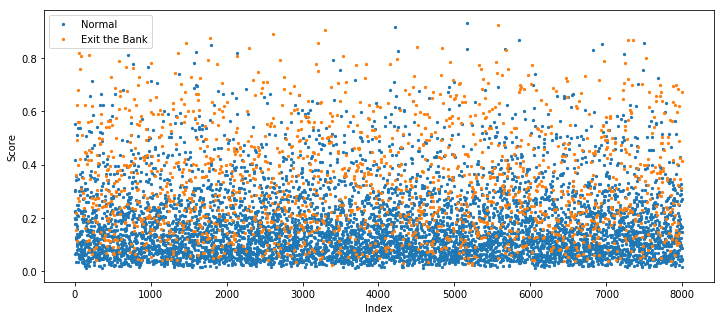

In [8]:
plt.figure(figsize = (12, 5))
plt.scatter(train_score.index[train_score['True_class'] == 0], 
            train_score[train_score['True_class'] == 0]['score'], 
            s = 5, label = 'Normal')
plt.scatter(train_score.index[train_score['True_class'] == 1], 
            train_score[train_score['True_class'] == 1]['score'], 
            s = 5, label = 'Exit the Bank')
plt.xlabel('Index')
plt.ylabel('Score')
plt.legend()
plt.show()


In [9]:
# Plotting the precision recall curve.
precision, recall, threshold = precision_recall_curve(train_score.True_class, train_score.score)
f1_score = 2 * precision * recall / (precision + recall)
average_precision = average_precision_score(train_score.True_class, train_score.score)


In [10]:
# Choosing the threshold to maximize the F1 score
max_f1 = f1_score[f1_score == max(f1_score)]
best_threshold = threshold[f1_score[1: ] == max_f1]


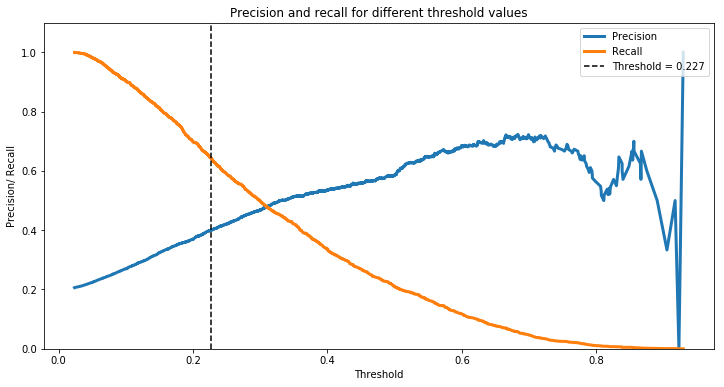

In [11]:
# Precision, Recall curve 
plt.figure(figsize = (12, 6))
plt.plot(threshold, precision[1: ], label = "Precision", linewidth = 3)
plt.plot(threshold, recall[1: ], label ="Recall", linewidth = 3)
plt.axvline(best_threshold, color = 'black', ls = '--', label = 'Threshold = %0.3f' % (best_threshold))
plt.ylim(0, 1.1)
plt.xlabel('Threshold')
plt.ylabel('Precision/ Recall')
plt.title('Precision and recall for different threshold values')
plt.legend(loc = 'upper right')


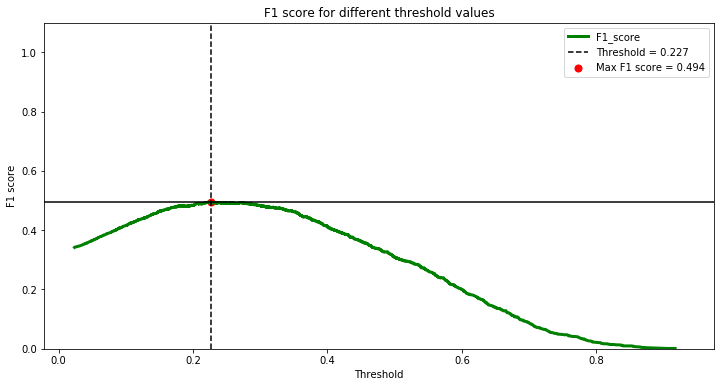

Best threshold = 0.226860
Max F1 score = 0.494239


In [12]:
# F1 score curve
plt.figure(figsize = (12, 6))
plt.plot(threshold, f1_score[1: ], label = "F1_score", linewidth = 3, color = 'green')
plt.scatter(threshold[f1_score[1: ] == max_f1], max_f1, label = 'Max F1 score = %0.3f' % (max_f1), s = 50, color = 'red')
plt.axvline(best_threshold, color = 'black', ls = '--', label = 'Threshold = %0.3f' % (best_threshold))
plt.axhline(max_f1, color = 'black', ls = '-')
plt.ylim(0, 1.1)
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score for different threshold values')
plt.legend(loc = 'upper right')
plt.show()
print('Best threshold = %f' % (best_threshold))
print('Max F1 score = %f' % (max_f1))


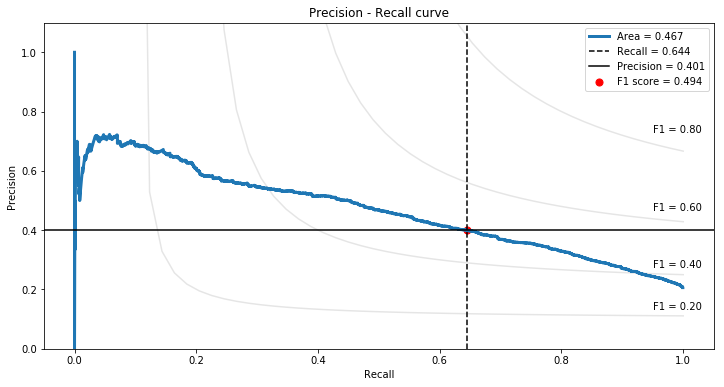

In [13]:
# Recall - Precision curve
plt.figure(figsize = (12, 6))
f_scores = np.linspace(0.2, 0.8, num = 4)

for f_score in f_scores:
    x = np.linspace(0.001, 1)
    y = f_score * x / (2 * x - f_score)
    plt.plot(x[y >= 0], y[y >= 0], color = 'gray', alpha = 0.2)
    plt.annotate('F1 = {0:0.2f}'.format(f_score), xy = (0.95, y[45] + 0.02))

plt.plot(recall[1: ], precision[1: ], label = 'Area = %0.3f' % (average_precision), linewidth = 3)
plt.scatter(recall[f1_score == max_f1], precision[f1_score == max_f1], label = 'F1 score = %0.3f' % (max_f1), s = 50, color = 'red')
plt.axvline(recall[f1_score == max_f1], color = 'black', ls = '--', label = 'Recall = %0.3f' % (recall[f1_score == max_f1]))
plt.axhline(precision[f1_score == max_f1], color = 'black', ls = '-', label = 'Precision = %0.3f' % (precision[f1_score == max_f1]))
plt.ylim(0, 1.1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall curve')
plt.legend(loc = 'upper right')
plt.show()


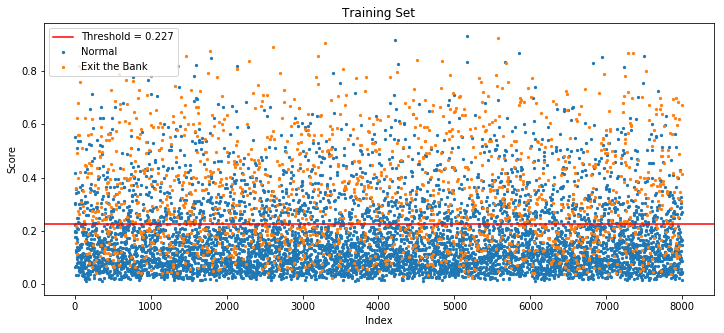

Best threshold = 0.226860


In [14]:
# Training Set
plt.figure(figsize = (12, 5))
plt.scatter(train_score.index[train_score['True_class'] == 0], 
            train_score[train_score['True_class'] == 0]['score'], 
            s = 5, label = 'Normal')
plt.scatter(train_score.index[train_score['True_class'] == 1], 
            train_score[train_score['True_class'] == 1]['score'], 
            s = 5, label = 'Exit the Bank')
plt.axhline(best_threshold, color = 'red', label = 'Threshold = %0.3f' % (best_threshold))
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Training Set')
plt.legend()
plt.show()
print('Best threshold = %f' % (best_threshold))


In [15]:
# Predicting the Test set
y_test_score = classifier.predict_proba(X_test)[:, 1]
y_pred = y_test_score > best_threshold


precision    recall  f1-score   support

           0       0.90      0.73      0.80      1595
           1       0.39      0.68      0.49       405

   micro avg       0.72      0.72      0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.72      0.74      2000



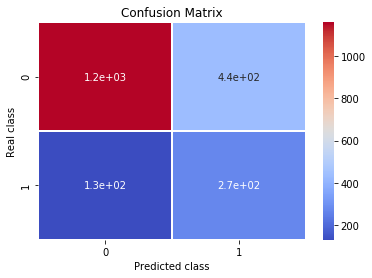

In [16]:
# Making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure()
sns.heatmap(cm, cmap = "coolwarm", annot = True, linewidths = 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Real class")
plt.show()


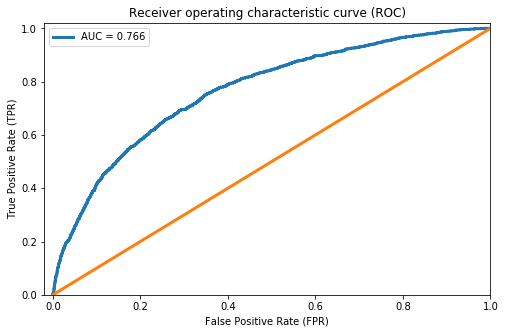

In [17]:
# ROC curve
fpr, tpr, thresholds = roc_curve(train_score.True_class, train_score.score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8, 5))
plt.plot(fpr, tpr, linewidth = 3, label = 'AUC = %0.3f' % (roc_auc))
plt.plot([0, 1], [0, 1], linewidth = 3)
plt.xlim(left = -0.02, right = 1)
plt.ylim(bottom = 0, top = 1.02)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver operating characteristic curve (ROC)')
plt.legend()
plt.show()